In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [11]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
62,IND,India,BARKHERA TPP,IND0000038,90.00,28.4723,79.8066,Coal,Oil,NaN,...,2019.0,NaN,505.7600,306.3790,354.9000,171.35500,133.91280,NaN,Central Electricity Authority,NaN
170,IND,India,DHALIPUR,IND0000095,51.00,30.4354,77.6821,Hydro,NaN,NaN,...,2019.0,NaN,229.9843,204.0347,179.4980,185.77645,218.89005,NaN,Central Electricity Authority,NaN
313,IND,India,KALINADI,IND0000174,855.00,15.2761,74.5268,Hydro,NaN,NaN,...,2019.0,NaN,3239.1429,1938.7376,1338.0959,1529.59360,2763.96075,NaN,Central Electricity Authority,NaN
823,IND,India,TVS Kunnur Wind Farm,WRI1026758,9.35,9.9438,77.5077,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,IND,India,NEPANAGAR MILL,WRI1020008,12.27,21.4504,76.4014,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [14]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Checking Null Values in the Dataset using Heatmap

<Axes: >

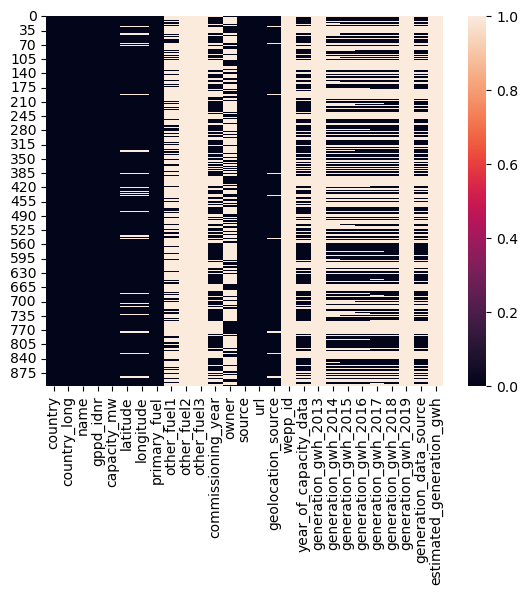

In [16]:
sns.heatmap(df.isnull())

Checking the count of null values present in each column

In [17]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Dropping non-useful columns

In [18]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [19]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                907 non-null    object 
 1   country_long           907 non-null    object 
 2   name                   907 non-null    object 
 3   capacity_mw            907 non-null    float64
 4   latitude               861 non-null    float64
 5   longitude              861 non-null    float64
 6   primary_fuel           907 non-null    object 
 7   commissioning_year     527 non-null    float64
 8   source                 907 non-null    object 
 9   url                    907 non-null    object 
 10  geolocation_source     888 non-null    object 
 11  year_of_capacity_data  519 non-null    float64
 12  generation_gwh_2013    0 non-null      float64
 13  generation_gwh_2014    398 non-null    float64
 14  generation_gwh_2015    422 non-null    float64
 15  genera

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000


In [22]:
df['year_of_capacity_data'].nunique()

1

In [23]:
df['name'].nunique()

907

In [24]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [25]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [26]:
df.fillna(df.median()[0],inplace=True)

In [27]:
df['source'].nunique()

191

In [28]:
df['geolocation_source'].nunique()

3

In [29]:
df['country'].nunique()

1

In [30]:
df['country_long'].nunique()

1

In [31]:
df.drop(['country','country_long','year_of_capacity_data','name','url'],axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


Dataset is set with no null values

Data Visualisation

<Axes: xlabel='primary_fuel', ylabel='count'>

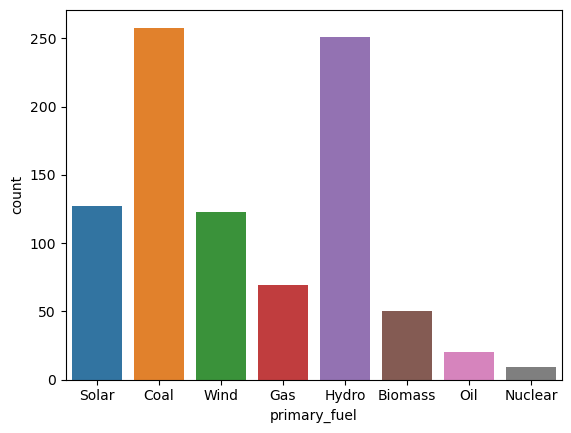

In [33]:
sns.countplot(data=df, x='primary_fuel')

<Axes: xlabel='capacity_mw', ylabel='count'>

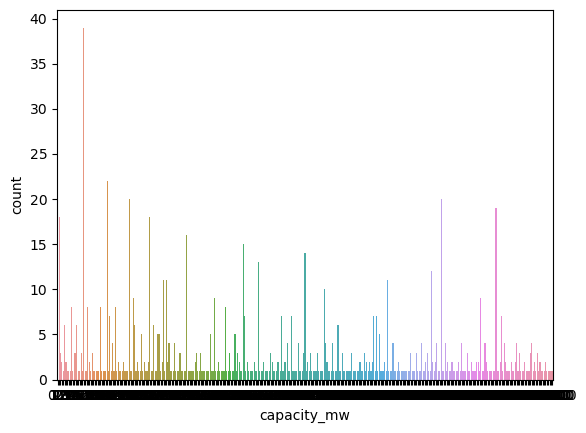

In [34]:
sns.countplot(data=df, x='capacity_mw')

Checking Correlation of the dataset

<Axes: >

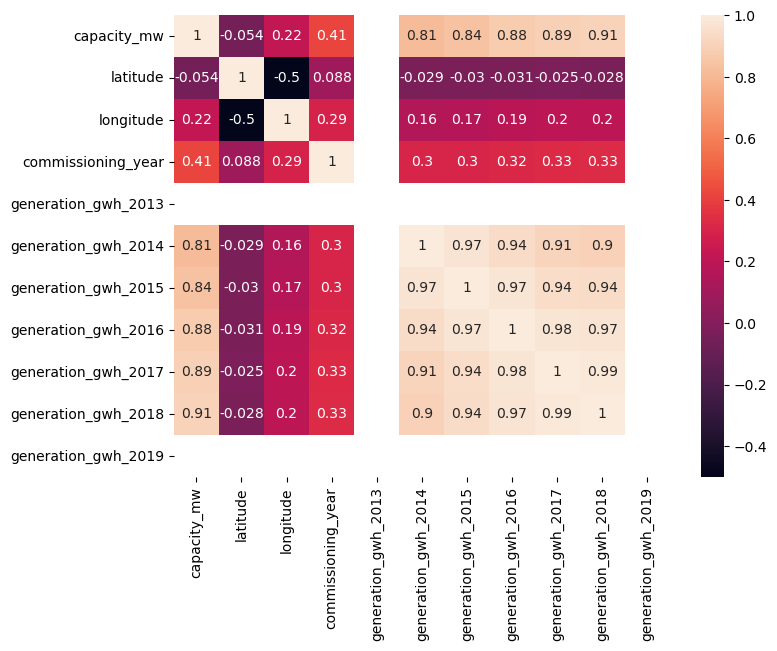

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

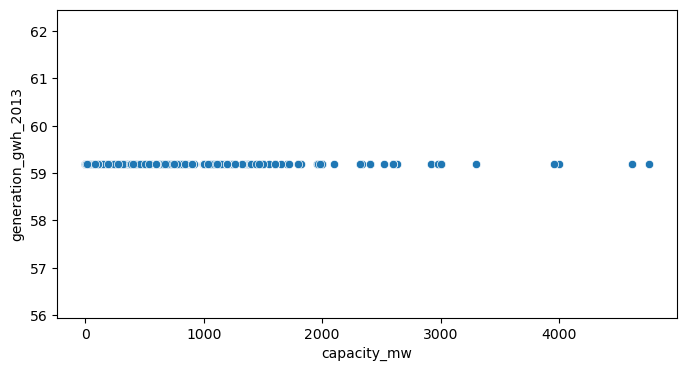

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

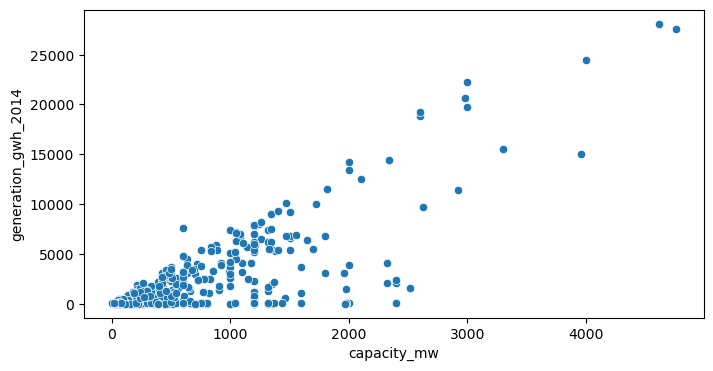

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

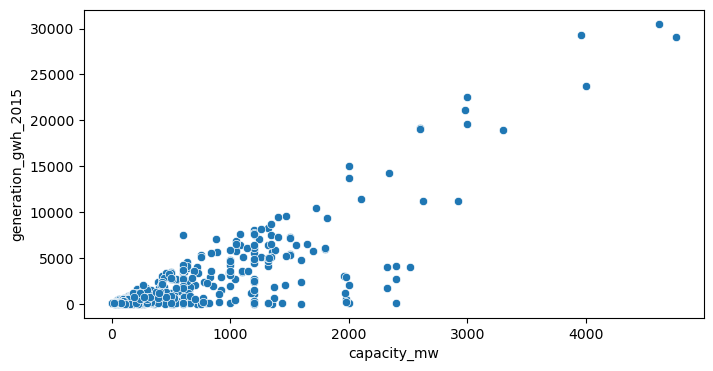

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

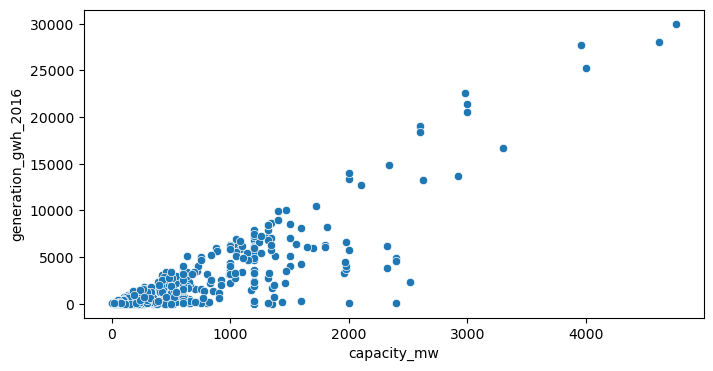

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

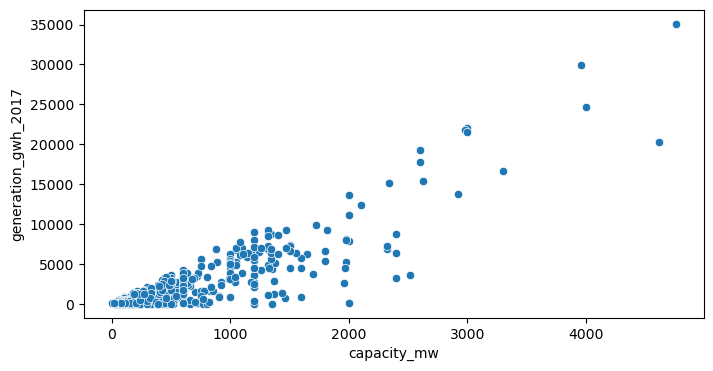

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

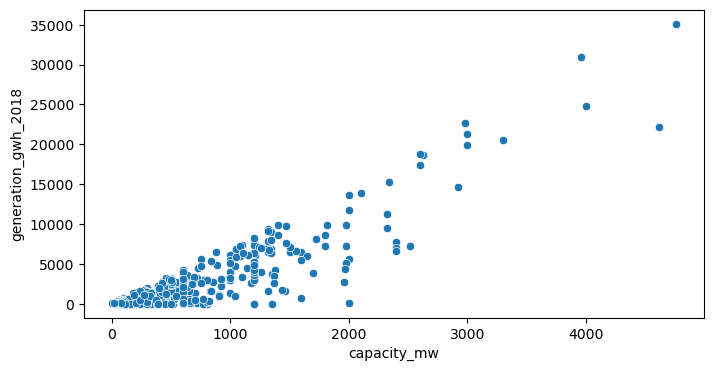

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2019'>

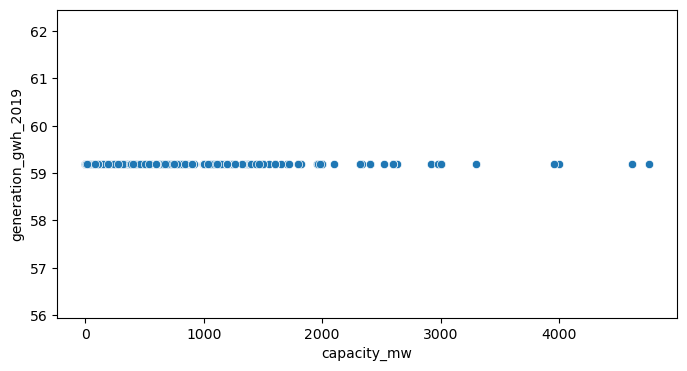

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2019',data=df)

<Axes: xlabel='capacity_mw', ylabel='latitude'>

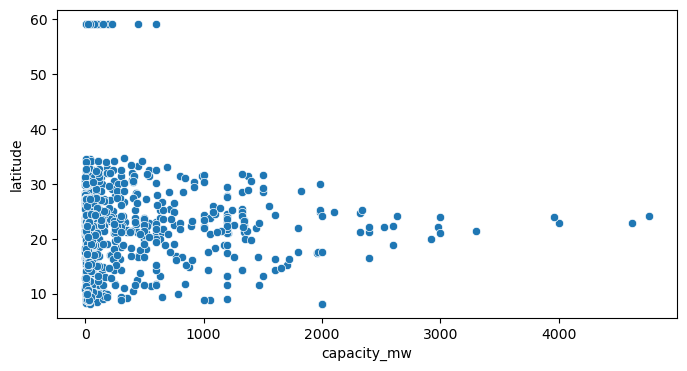

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

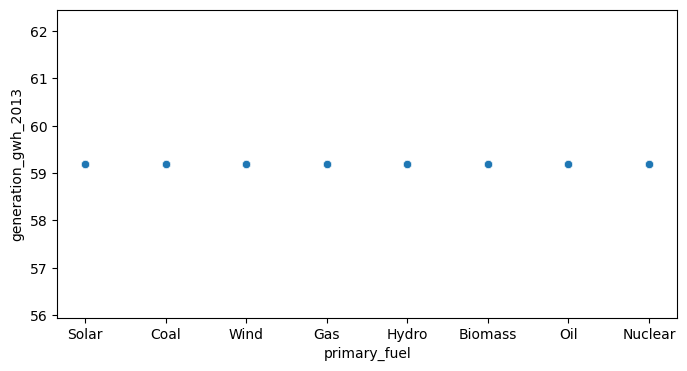

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

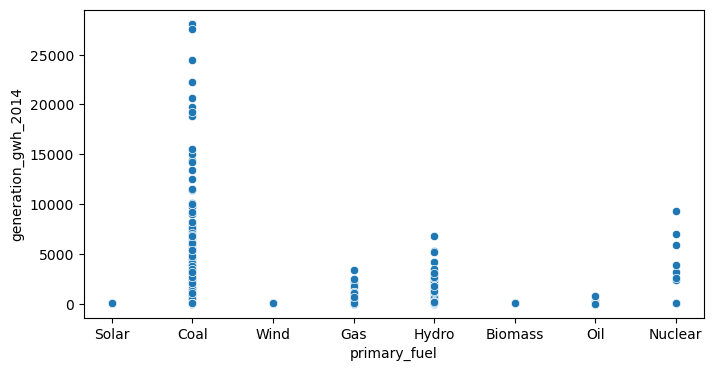

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

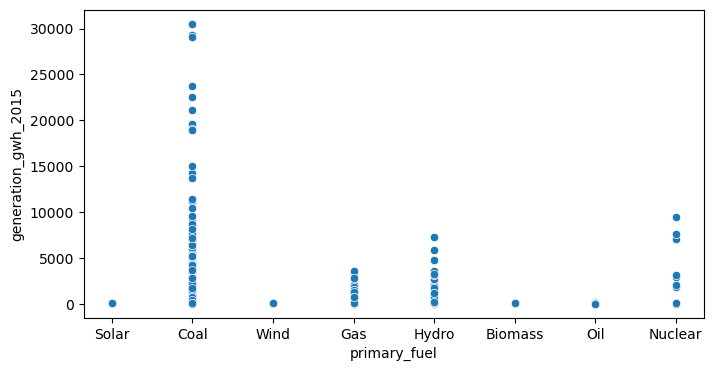

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

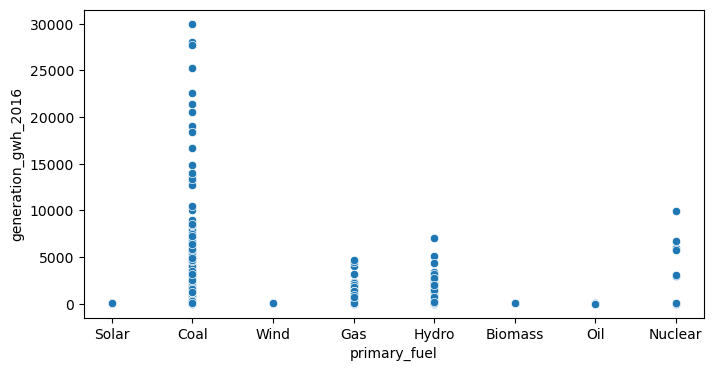

In [47]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

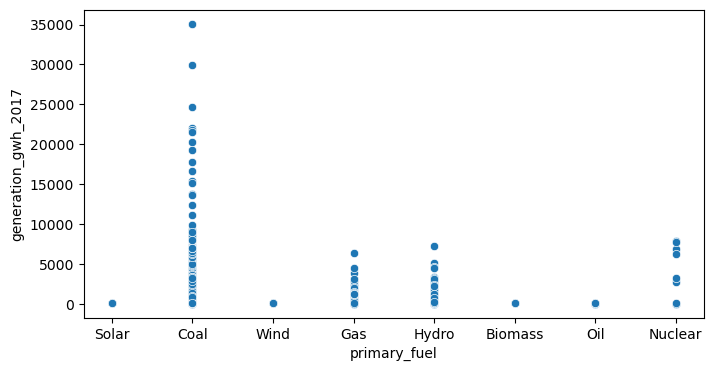

In [48]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

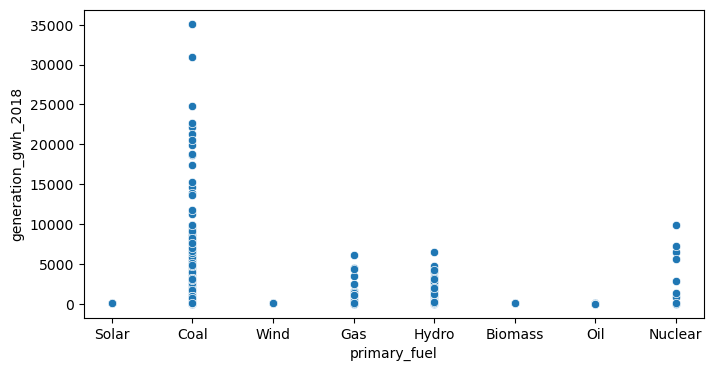

In [49]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2019'>

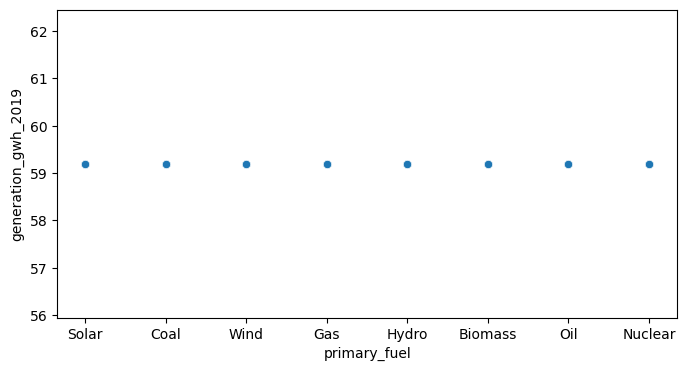

In [50]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2019',data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

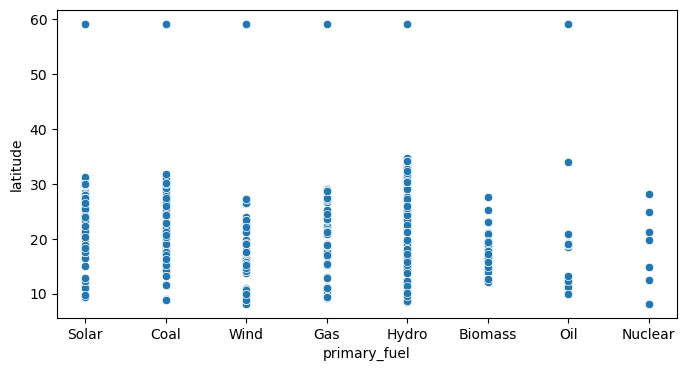

In [51]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

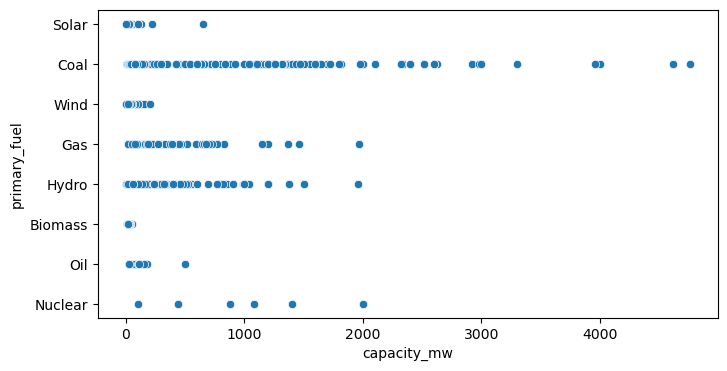

In [52]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Data Encoding

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), object(3)
memory usage: 99.3+ KB


In [54]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Using LabelEncoder

In [55]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [56]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    float64
dtypes: float64(11), int32(3)
memory usage: 88.7 KB


Checking Outliers

capacity_mw               Axes(0.125,0.712609;0.133621x0.167391)
latitude               Axes(0.285345,0.712609;0.133621x0.167391)
longitude               Axes(0.44569,0.712609;0.133621x0.167391)
primary_fuel           Axes(0.606034,0.712609;0.133621x0.167391)
commissioning_year     Axes(0.766379,0.712609;0.133621x0.167391)
source                    Axes(0.125,0.511739;0.133621x0.167391)
geolocation_source     Axes(0.285345,0.511739;0.133621x0.167391)
generation_gwh_2013     Axes(0.44569,0.511739;0.133621x0.167391)
generation_gwh_2014    Axes(0.606034,0.511739;0.133621x0.167391)
generation_gwh_2015    Axes(0.766379,0.511739;0.133621x0.167391)
generation_gwh_2016        Axes(0.125,0.31087;0.133621x0.167391)
generation_gwh_2017     Axes(0.285345,0.31087;0.133621x0.167391)
generation_gwh_2018      Axes(0.44569,0.31087;0.133621x0.167391)
generation_gwh_2019     Axes(0.606034,0.31087;0.133621x0.167391)
dtype: object

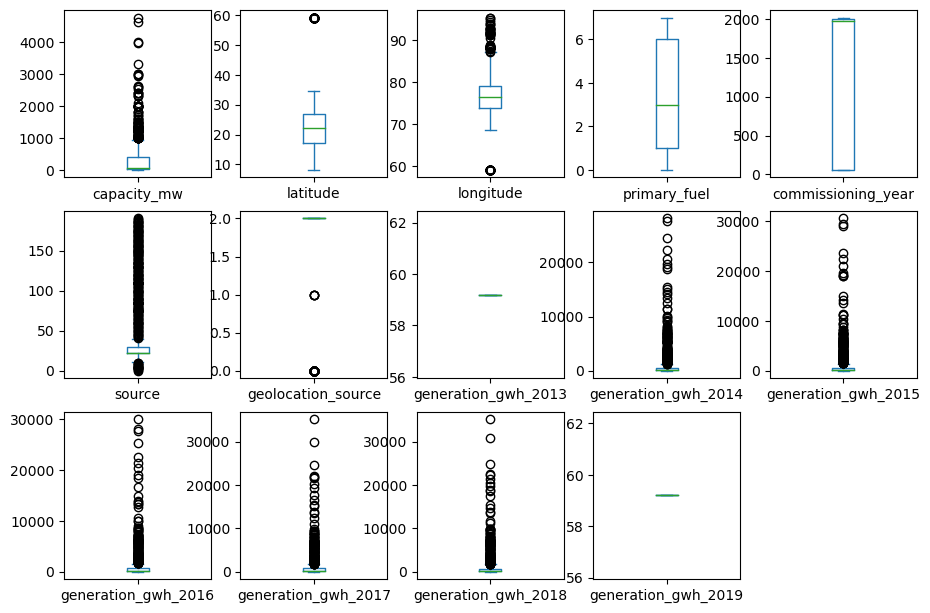

In [58]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(11,10))

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df[['longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]))
z

,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.526774,1.460215,0.357473,0.356430,0.369673,0.380384,0.382173
1,0.308213,2.917019,0.357473,0.356430,0.369673,0.380384,0.382173
2,1.144536,0.512075,0.357473,0.356430,0.369673,0.380384,0.382173
3,2.367481,0.489662,0.165681,0.102731,0.104488,0.189891,0.209552
4,0.937708,0.489662,0.664461,1.537600,1.613686,1.297882,1.815722
...,...,...,...,...,...,...,...
902,0.130697,0.489662,0.357473,0.375252,0.313738,0.126362,0.191207
903,0.259856,0.743019,0.357473,0.356430,0.369673,0.380384,0.382173
904,0.152938,0.512075,0.357473,0.356430,0.369673,0.380384,0.382173
905,0.445790,0.339596,0.357473,0.356430,0.369673,0.380384,0.382173


In [60]:
z=np.abs(zscore(df[['longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]))
threshold=3
df1 = df[(z<3).all(axis = 1)]

In [61]:
df=df1.copy()

Checking Skewness

array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'primary_fuel'}>],
       [<Axes: title={'center': 'commissioning_year'}>,
        <Axes: title={'center': 'source'}>,
        <Axes: title={'center': 'geolocation_source'}>,
        <Axes: title={'center': 'generation_gwh_2013'}>],
       [<Axes: title={'center': 'generation_gwh_2014'}>,
        <Axes: title={'center': 'generation_gwh_2015'}>,
        <Axes: title={'center': 'generation_gwh_2016'}>,
        <Axes: title={'center': 'generation_gwh_2017'}>],
       [<Axes: title={'center': 'generation_gwh_2018'}>,
        <Axes: title={'center': 'generation_gwh_2019'}>, <Axes: >,
        <Axes: >]], dtype=object)

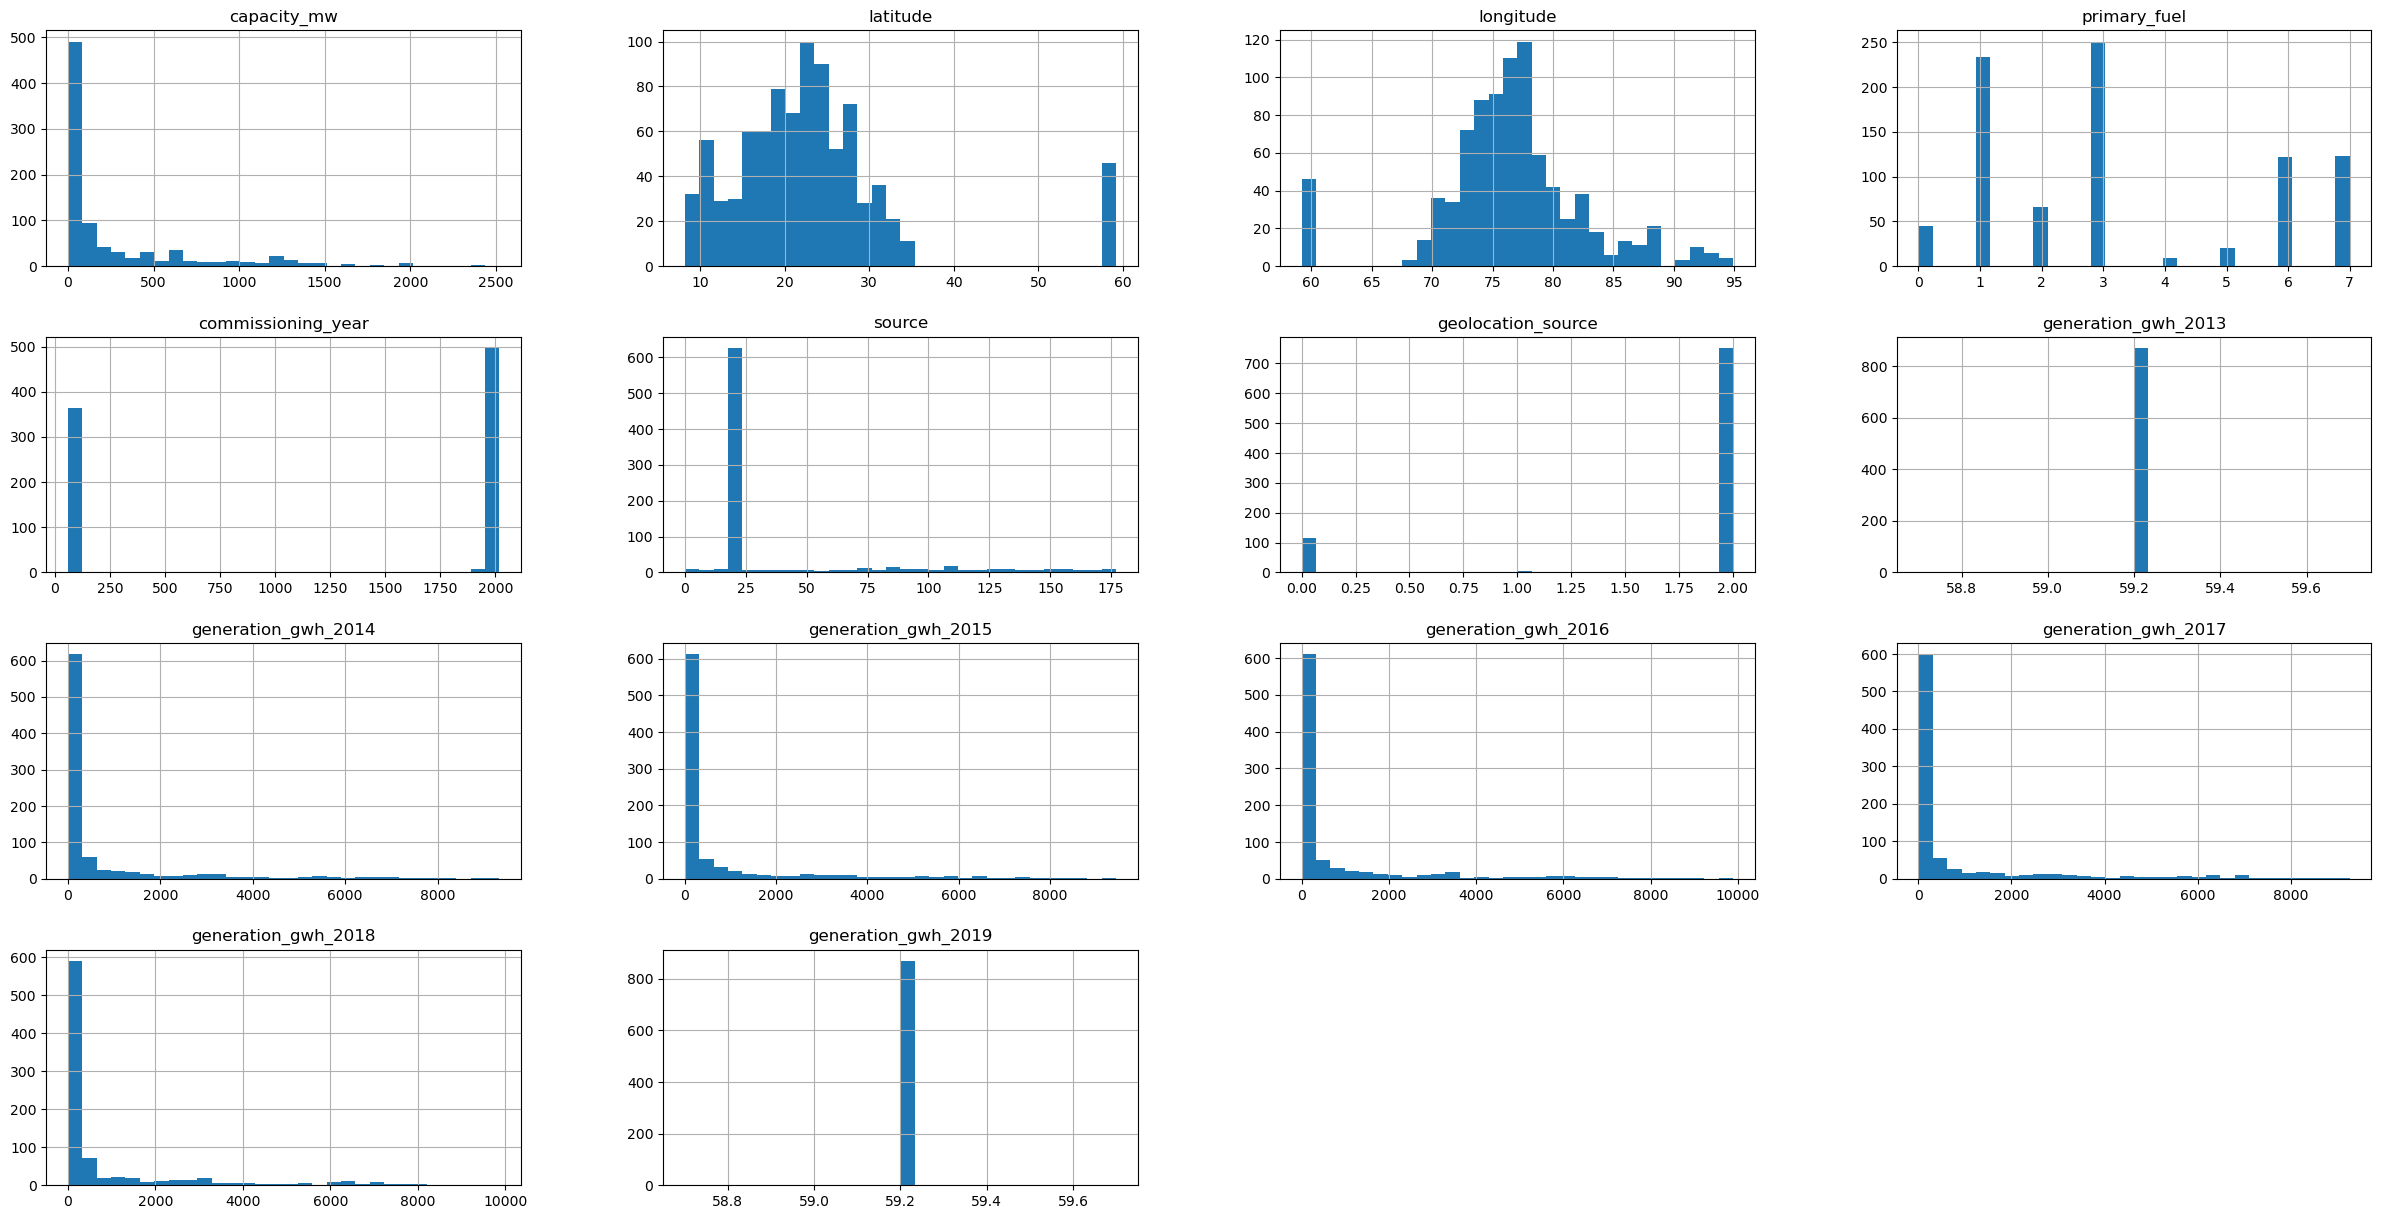

In [62]:
df.hist(bins=30,figsize=(30,15))

In [63]:
df.skew()

capacity_mw            2.204268
latitude               1.909293
longitude             -0.339310
primary_fuel           0.438330
commissioning_year    -0.326076
source                 1.842551
geolocation_source    -2.160924
generation_gwh_2013    0.000000
generation_gwh_2014    2.830125
generation_gwh_2015    2.633177
generation_gwh_2016    2.568077
generation_gwh_2017    2.480624
generation_gwh_2018    2.523178
generation_gwh_2019    0.000000
dtype: float64

In [64]:
for i in df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [65]:
df.skew()

capacity_mw            0.088054
latitude               0.226894
longitude             -0.339310
primary_fuel           0.438330
commissioning_year    -0.326076
source                 0.835233
geolocation_source    -2.160924
generation_gwh_2013    0.000000
generation_gwh_2014    0.178343
generation_gwh_2015    0.184334
generation_gwh_2016    0.154800
generation_gwh_2017    0.099348
generation_gwh_2018    0.010568
generation_gwh_2019    0.000000
dtype: float64

Implementing ML(capacity_mw)

In [66]:
x=df.iloc[:,1:14]
y=df.iloc[:,0]

In [67]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,3.373617,73.2407,6,2011.0,4.700480,1,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
1,3.249067,74.6090,1,59.2,5.164786,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
2,3.131303,69.3732,7,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
3,3.213711,91.3602,2,2004.0,3.135494,2,59.2,6.427765,6.739037,6.787850,6.499448,6.441328,59.2
4,3.133767,82.4091,1,2015.0,3.135494,2,59.2,8.018477,8.685647,8.739376,8.591666,8.892886,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.850412,77.3568,1,2016.0,3.135494,2,59.2,4.097672,0.690581,5.457868,6.764347,6.533062,59.2
903,2.631400,78.1654,6,59.2,4.356709,0,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
904,2.789679,75.5811,7,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
905,3.232779,73.7477,1,59.2,4.094345,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2


In [68]:
y

0      1.252763
1      4.595120
2      3.693867
3      4.912655
4      7.496097
         ...   
902    7.378384
903    1.386294
904    3.277145
905    4.394449
906    2.862201
Name: capacity_mw, Length: 870, dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(609, 13)
(261, 13)
(609,)
(261,)


In [70]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [71]:
LR.coef_

array([ 2.39829267e-02,  1.27323146e-02, -1.31653027e-01,  3.79601637e-04,
       -1.40501095e-01,  4.38796671e-01, -8.32667268e-17, -3.19172651e-02,
        2.04649145e-01,  1.34178781e-01,  1.62223264e-01, -1.50552680e-02,
        0.00000000e+00])

In [72]:
LR.intercept_

0.5711852540540105

In [73]:
LR.score(x_train,y_train)

0.6169617689639784

In [74]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [2.06850611 2.82807773 4.25012837 2.99486993 5.98521926 4.30233988
 6.4476052  3.02675938 3.53537773 5.38550886 3.0127993  2.24892617
 3.73944274 4.92104043 3.06339701 5.06575401 2.03496428 4.43700225
 5.69710637 7.07965077 5.65992809 5.68912254 5.42270135 3.73067162
 4.06581549 3.69154148 3.5551644  3.01384083 6.04044931 6.49219551
 3.01921762 4.63563318 3.64580553 5.93276339 5.46320077 4.98930368
 4.44671332 3.64591626 5.56867753 3.01835629 3.01973778 3.3829423
 2.06702096 1.96120356 1.98315899 1.92857279 2.95025186 6.4610536
 5.08622927 5.21568068 5.50263918 6.68111054 5.22806873 2.95301781
 3.65377474 6.35573714 6.46529732 4.62541126 5.8796397  4.75645773
 3.46409312 4.28699118 3.76520058 4.78355666 1.9797564  6.06718278
 4.24114982 4.57307411 5.18728382 4.51837938 3.71773194 4.08403637
 2.99377751 4.28701524 6.32386    2.94549077 2.07338839 4.86320203
 5.54375784 3.64784765 6.70079679 4.89771035 4.30255501 4.2706837
 3.28354825 6.46861508 5.99869924 5.99330949 6.58

In [75]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))
print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 1.3424472968106742
Mean Absolute Error: 0.875888444692586
Root Mean Squared Error: 1.1586402792975368
R2 Score: 0.6011626453917633


The model has an Root Mean Squared Error score of ~1.15. This implies that lower is the RMSE score, therefore model is performing better at making predictions.


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(696, 13)
(174, 13)
(696,)
(174,)


In [77]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
RFR.score(x_train,y_train)

0.9655695875129574

In [79]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [2.68187509 3.0651992  6.51880348 3.00205742 5.86327351 2.80482659
 6.72383138 3.47784196 3.73722471 5.30204278 2.96098954 2.01160411
 5.06277674 4.02711185 3.93328283 4.99163903 1.33785411 5.67002089
 5.38053652 7.32307716 5.57412242 5.68178448 5.02681505 2.98641304
 2.09514337 3.89758074 3.72948609 3.01047099 6.27292047 7.12905226
 2.45558006 4.04673925 2.97937255 6.8364224  5.61732393 4.82506909
 4.32740602 3.27108846 5.5809918  5.11701381 1.61155402 3.86218653
 2.87660409 3.70602029 2.79602608 2.79666661 2.75385926 6.8446267
 6.08569238 4.42765482 5.59726454 7.19013239 4.96179349 3.07890568
 3.93407928 7.29800979 7.06211456 3.2695186  6.09619103 4.69186086
 3.48764926 2.680687   3.0999239  4.02286046 2.52838263 6.04445019
 2.58112556 3.95455168 4.38291182 3.95560279 3.36673767 1.92252974
 3.14102263 5.58943625 7.07640848 3.43033299 2.58267645 4.43122777
 5.37415255 3.8683803  7.24571955 4.64115325 2.68410201 2.73825807
 4.66743773 7.2124192  6.33009464 6.55423296 7.

In [80]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))
print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.5458581516072543
Mean Absolute Error: 0.5433944858820055
Root Mean Squared Error: 0.7388221380056599
R2 Score: 0.8499701627372787


The model has an Root Mean Squared Error score of ~0.72. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

Saving the model

In [81]:
import joblib
joblib.dump(RFR,'Global_Power_Plant_Database_Final.obj')

['Global_Power_Plant_Database_Final.obj']

Implementing ML(primary_fuel)

In [82]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [83]:
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,1.252763,3.373617,73.2407,2011.0,4.700480,1,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
1,4.595120,3.249067,74.6090,59.2,5.164786,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
2,3.693867,3.131303,69.3732,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
3,4.912655,3.213711,91.3602,2004.0,3.135494,2,59.2,6.427765,6.739037,6.787850,6.499448,6.441328,59.2
4,7.496097,3.133767,82.4091,2015.0,3.135494,2,59.2,8.018477,8.685647,8.739376,8.591666,8.892886,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,7.378384,2.850412,77.3568,2016.0,3.135494,2,59.2,4.097672,0.690581,5.457868,6.764347,6.533062,59.2
903,1.386294,2.631400,78.1654,59.2,4.356709,0,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
904,3.277145,2.789679,75.5811,59.2,3.091042,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2
905,4.394449,3.232779,73.7477,59.2,4.094345,2,59.2,4.097672,4.097672,4.097672,4.097672,4.097672,59.2


In [84]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 870, dtype: int32

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(696, 13)
(174, 13)
(696,)
(174,)


In [86]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
DTCpred=DTC.predict(x_test)
DTCpred

array([6, 7, 1, 7, 3, 3, 1, 7, 1, 2, 7, 6, 1, 3, 5, 3, 6, 3, 3, 1, 3, 3,
       2, 1, 3, 1, 1, 7, 1, 1, 7, 3, 0, 2, 3, 1, 3, 0, 3, 7, 7, 2, 6, 5,
       6, 6, 7, 1, 3, 3, 3, 4, 2, 7, 1, 1, 1, 3, 4, 3, 3, 3, 0, 3, 6, 4,
       3, 3, 2, 3, 1, 3, 7, 3, 3, 7, 6, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 1,
       1, 1, 1, 6, 4, 3, 1, 3, 5, 7, 1, 2, 3, 3, 6, 1, 3, 3, 2, 3, 1, 7,
       2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 3, 1, 1, 5, 6, 2, 6, 6, 1, 7, 7,
       1, 6, 1, 7, 3, 2, 1, 3, 6, 1, 1, 1, 1, 1, 1, 6, 3, 3, 7, 1, 6, 6,
       3, 1, 1, 2, 2, 1, 6, 3, 7, 7, 2, 1, 1, 7, 0, 2, 0, 1, 7, 6])

In [88]:
accuracy_score(y_test,DTCpred)

0.764367816091954

The accuracy score using Decision Tree CLassifier is 76.4%

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(609, 13)
(261, 13)
(609,)
(261,)


In [90]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
RFCpred=RFC.predict(x_test)
RFCpred

array([6, 7, 1, 7, 1, 3, 1, 7, 1, 3, 7, 6, 3, 3, 5, 3, 6, 1, 2, 1, 3, 3,
       2, 0, 3, 1, 1, 7, 3, 1, 7, 3, 0, 1, 3, 3, 3, 0, 1, 7, 7, 2, 6, 5,
       6, 6, 7, 1, 3, 3, 3, 1, 3, 7, 1, 1, 1, 3, 1, 3, 3, 3, 0, 3, 6, 3,
       3, 3, 3, 3, 1, 3, 7, 1, 3, 7, 6, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 2, 1, 6, 1, 3, 1, 3, 5, 7, 3, 1, 3, 3, 6, 1, 3, 3, 2, 3, 1, 7,
       1, 2, 1, 1, 1, 0, 3, 1, 3, 3, 1, 3, 2, 1, 5, 6, 0, 6, 6, 1, 7, 7,
       1, 6, 1, 7, 3, 3, 1, 2, 6, 1, 1, 1, 3, 1, 1, 6, 3, 3, 7, 1, 6, 6,
       3, 1, 1, 1, 2, 1, 6, 3, 7, 7, 1, 1, 1, 7, 0, 2, 0, 1, 7, 6, 2, 3,
       1, 3, 6, 1, 1, 7, 2, 3, 3, 2, 1, 1, 3, 6, 1, 1, 7, 1, 1, 6, 3, 7,
       7, 3, 3, 3, 7, 7, 7, 1, 1, 7, 3, 3, 1, 7, 3, 3, 3, 7, 3, 0, 1, 3,
       3, 5, 0, 3, 2, 3, 1, 3, 3, 1, 0, 2, 7, 0, 3, 7, 7, 3, 3, 1, 7, 1,
       7, 3, 3, 3, 3, 1, 1, 1, 7, 1, 7, 7, 3, 1, 3, 1, 3, 3, 3])

In [92]:
accuracy_score(y_test,RFCpred)

0.8544061302681992

The accuracy score using Random Forest CLassifier is 85.4%